In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00



image 1/1 /content/new_pill_tray_image.jpg: 512x640 3 pills, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)
Number of pills detected: 3


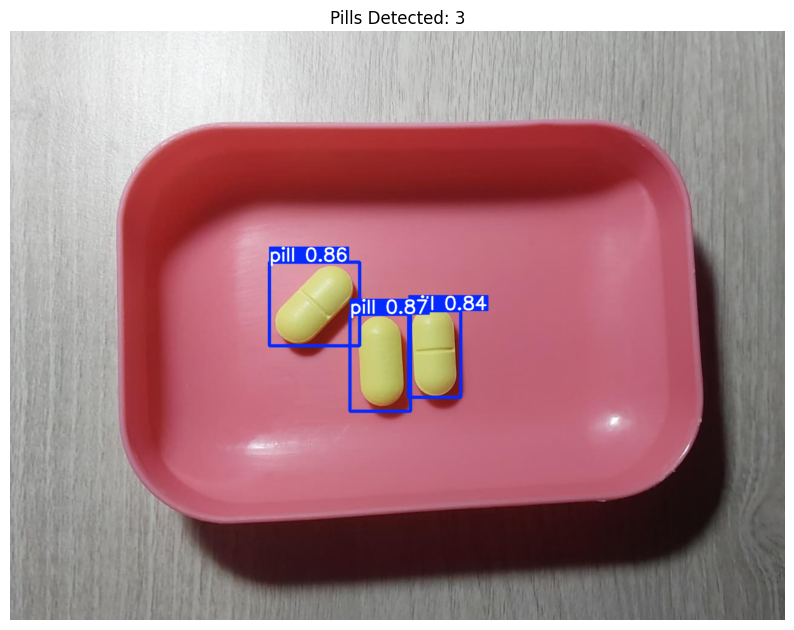

Coordinates: tensor([561.4410, 467.1590, 661.6486, 627.8185], device='cuda:0')
Confidence: 0.8660187125205994
Class ID: 0.0
Coordinates: tensor([428.1347, 381.2897, 577.3371, 519.1418], device='cuda:0')
Confidence: 0.864721417427063
Class ID: 0.0
Coordinates: tensor([658.4258, 461.4025, 744.3881, 604.5726], device='cuda:0')
Confidence: 0.8370623588562012
Class ID: 0.0


In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your custom-trained model.
# The path should be 'best.pt' if you uploaded it directly to the notebook's root directory.
model = YOLO('best.pt')

# Run inference on your new image.
# The 'source' can be a file path, a URL, a NumPy array, or even a webcam (source=0).
# The 'conf' argument sets the confidence threshold. Adjust it if needed.
results = model.predict(source='new_pill_tray_image.jpg', conf=0.80)

# --- Process the Results and Get the Count ---
# The results object is a list of predictions, one for each image you pass to it.
# Since we passed one image, we will get one result object.
for result in results:
    # Get the bounding boxes from the result object.
    boxes = result.boxes

    # Count the number of detected pills.
    # The 'len' function gives us the number of bounding boxes, which is our pill count.
    pill_count = len(boxes)
    print(f"Number of pills detected: {pill_count}")

    # --- Visualize the Predictions (Optional) ---
    # The 'plot()' method draws the bounding boxes and labels on the image for you.
    im_bgr = result.plot()
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib

    plt.figure(figsize=(10, 8))
    plt.imshow(im_rgb)
    plt.title(f'Pills Detected: {pill_count}')
    plt.axis('off') # Hide the axes
    plt.show()

# You can also access detailed information about each detection:
for box in boxes:
#     # The coordinates of the bounding box
    print(f"Coordinates: {box.xyxy[0]}")
#     # The confidence score of the detection
    print(f"Confidence: {box.conf[0]}")
#     # The class ID (will be 0 for 'pill' since it's the first class)
    print(f"Class ID: {box.cls[0]}")